# <span style = "color:#e07b07;font-family:arial bold"> Logistic Regression

### <span style = "color:#e07b07;font-family:arial bold">Logistic Regression is used to predict a categorical varibale

## <span style = "color:#e07b07;font-family:arial bold"> Overview
* Transfroming Linear Regression to logistic regression
* Mathematical Theory behind Logistic Regression
* Simple Implementation of Logistic Regression for classification problem
* Interpreting Results
    * Odds Ratio and Coefficients
    * Classification Metrics
        * Accuracy
        * Precision
        * Recall
    * ROC Curves
* Multicalss Classification with Logistic Regression

## <span style = "color:#e07b07;font-family:arial bold"> Logistic Regression will allow us to predict a categorical label based on historical feature data</span>
## <span style = "color:#e07b07;font-family:arial bold"> The categorical target column is two or more discrete class labels.

### <span style = "color:#e07b07;font-family:arial bold"> Calssification algorithms predict a class or category label:
* Class 0: Car Image
* Class 1: Street Image
* Class 2: Bridge Image

## <span style = "color:#e07b07;font-family:arial bold"> Even a continous target can be converted into categories through bucketing them for e.g.
* Class 0: House Price $0-100k  

* Class 1: House Price $100k-200k

* Class 2: House Price <$200k

## <span style = "color:#e07b07;font-family:arial bold"> Our Prediction $\hat{y}$ will be a category, meaning we will not be calcuating a difference based ${y}$ - $\hat{y}$ rather we calculate accuracy

# <span style = "color:#86a303;font-family:arial bold">Logistic Regression: Theory and Intuition - Logistic fucntion

### <span style = "color:#86a303;font-family:arial bold"> Logistic Regression works by transforming a Linear Regression into classification model through the use of the logistic function also know as sigmoid function

# $\sigma{(x)}{ = } \large{\frac{1}{{1}{ +  }{e}^{-x}}}$

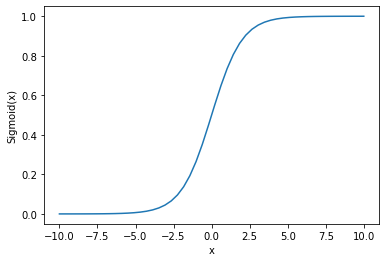

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def sig(x):
 return 1/(1 + np.exp(-x))
x = np.linspace(-10, 10, 50)   
p = sig(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p) 
plt.show()

# <span style = "color:#86a303;font-family:arial bold">Above show is the logistic function a Sigmoid function</span>
## <span style = "color:#86a303;font-family:arial bold">* Notice here in the curve there is "Leveling Off" behaviour.One side of the curve is flattening at 0 and another at 1.
* Also notice any value of X will have an output range between 0 and 1

## <span style = "color:#86a303;font-family:arial bold"> Logistic Regression - Linear to Logistic

In [118]:
# Lets make a sample data
import pandas as pd

In [119]:
data = {"Income":[-5,-4,-2,-1,0,2,3,4,5],"Loan_Paid":[0,0,0,0,0,1,1,1,1]}

In [120]:
df = pd.DataFrame(data)

In [121]:
df

,Income,Loan_Paid
0,-5,0
1,-4,0
2,-2,0
3,-1,0
4,0,0
5,2,1
6,3,1
7,4,1
8,5,1


#### <span style = "color:#86a303;font-family:arial bold"> Let's begin by plotting income versus default:

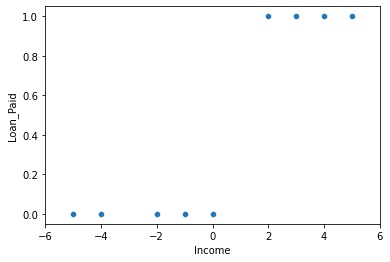

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.axes()
sns.scatterplot(x = "Income", y = "Loan_Paid", data = df,palette="winter"  )
ax.set_xticks([-6,-4,-2,0,2,4,6]);

## <span style = "color:#86a303;font-family:arial bold"> As we can see from above we cannot use linear regression in this case. Also would be unclear how to intercept predicted y values between 0 and 1
   


# <span style = "color:#86a303;font-family:arial bold">  we can make use of the logistic functoin for a conversion from linear to logistic

''

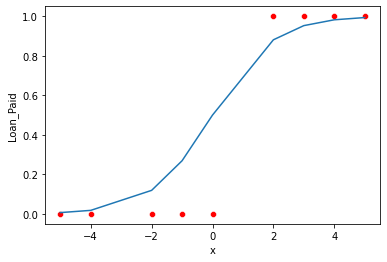

In [123]:
fig,ax=plt.subplots()
ax= plt.axes()
sns.scatterplot(x = "Income", y = "Loan_Paid", data = df, color = 'red')
ax.set_xticks([-6,-4,-2,0,2,4,6])
def sig(x):
 return 1/(1 + np.exp(-x))
x = df["Income"]
p = sig(x)
plt.xlabel("x") 
plt.plot(x, p) 
;

## <span style = "color:#86a303;font-family:arial bold">From above we can see how Logistic Regression look like
* Treat y-axis as a probability of belonging to a class:
* Then treat $\Large{P}{(y=1)} {>}{ = }{0.5}$ as a cut-off for classificatoin:

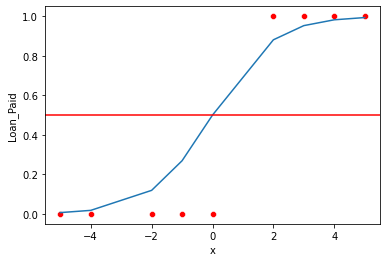

In [124]:
fig,ax=plt.subplots()
ax= plt.axes()
sns.scatterplot(x = "Income", y = "Loan_Paid", data = df, color = 'red')
ax.set_xticks([-6,-4,-2,0,2,4,6])
def sig(x):
 return 1/(1 + np.exp(-x))
x = df["Income"]
p = sig(x)
plt.xlabel("x") 
plt.plot(x, p) 
plt.axhline(y=0.5, color = 'r', ls = '-');


## <span style = "color:#86a303;font-family:arial bold"> Above red line is cut - off for clasificaton

## <span style = "color:#86a303;font-family:arial bold"> For e.g
* A new person with an income of 1
* Predict a 0.9 probability on y axis which mean 90% of paying off loan, the function will return prediciton is 1 as it is above 0.5

# <span style = "color:#86a303;font-family:arial bold"> Logistic Regression- Linear to Logistic Math

## <span style = "color:#86a303;font-family:arial bold"> We already know the linear Regression euqation:

$\Large\hat{y}{ = } \beta_{0}{x}_{0}{ + ....}{ + }\beta_{n}{x}_{n}$

$\Large\hat{y}{ = } \sum^{n}_{i=0}\beta_{i}{x}_{i}$


## <span style = "color:#86a303;font-family:arial bold"> We also the logistic function which transfroms any input to be between 0 and 1

# $\sigma{(x)}{ = } \large{\frac{1}{{1}{ +  }{e}^{-x}}}$
 

## <span style = "color:#86a303;font-family:arial bold"> All we need to do is plug the Linear Regresssion equation into logistic function to create logistic Regression!

$\Large\hat{y} { = }\sigma{ (\beta_{0}{x}{0}{ + ....}{ + }\beta_{n}{x}_{n})}$

$\Large\hat{y} { = }\sigma\left(\sum^{n}_{i=0}\beta_{i}{x}_{i}\right)$

## <span style = "color:#86a303;font-family:arial bold"> Writting it out fully and replacing $\Large\sigma$

# $\Large\hat{y} { = }\frac{1}{{1}{ + }{e}^{{-}\sum^{n}_{i=0}\underline{\beta_{i}{x}_{i}}}}$

## <span style = "color:#86a303;font-family:arial bold">The above equation is a Logistic Regression , however how do we interpret the coefficients and their relation to $\Large\hat{y}$ ?(underlined part)

## <span style = "color:#86a303;font-family:arial bold"> First thing we need to understand the term ODDS in terms of understanding realion of predicted y to coefficients</span>
## <span style = "color:#86a303;font-family:arial bold">The ODDS of an event with probability p is defined as the chance of the event not happening:</span>
$\Large\frac{p}{1 - p}$
### <span style = "color:#86a303;font-family:arial bold">Imagine an event with 50% probability of occuring.This is $\Large\frac{0.5}{1 - 0.5}$ which is $\Large\frac{0.5}{0.5}$, the same as $\Large\frac{1}{1}$ or 1 to 1 ODDS of occuring. Which means change of an event happening is same as change of an event not happening

## <span style = "color:#86a303;font-family:arial bold">Taking the Logistic Regression formula, we can rearrange it to show that it is equivalent to modelling the log of the odds as a linear combination of features</span>
    
## <span style = "color:#86a303;font-family:arial bold"> Which means this allow us to solve for the coefficients and feature x in terms of logg odds

## <span style = "color:#86a303;font-family:arial bold"> Solving for Log Odds:</span>
#  $\Large\hat{y} { = }\frac{1}{{1}{ + }{e}^{{-}\sum^{n}_{i=0}\beta_{i}{x}_{i}}}$

## <span style = "color:#86a303;font-family:arial bold"> First step is to get rid of denomniator</span>
# $ \Large\hat{y} { + }\hat{y}{e}^{{-}\sum^{n}_{i=0}\beta_{i}{x}_{i}}{ = } {1} $
## <span style = "color:#86a303;font-family:arial bold"> Second step</span>
# $ \Large\hat{y}{e}^{{-}\sum^{n}_{i=0}\beta_{i}{x}_{i}}{ = } {1}{ - }\hat{y}  $
## <span style = "color:#86a303;font-family:arial bold"> Third step divide both side by 1- $\hat{y}$</span>
# $ \Large\frac{\hat{y}}{{1 -} \hat{y}} { = } {e}^{\sum^{n}_{i=0}\beta_{i}{x}_{i}} $
## <span style = "color:#86a303;font-family:arial bold"> We can get rid of e with natual log</span>
# $ \Large{ln}{\left(\frac{\hat{y}}{{1 -} \hat{y}}\right)} { = } \sum^{n}_{i=0}\beta_{i}{x}_{i} $

## <span style = "color:#86a303;font-family:arial bold"> Consider p = 0.5 and if we go with left hand side of the above function it will be </span>
$ \Large{ln}{\left(\frac{0.5}{{1 - 0.5} }\right)} { = }{0}$


## <span style = "color:#86a303;font-family:arial bold"> As p goes to 1 then log odds becomes $\Large\infty$</span>
# ${lim}_{{p}\rightarrow{1}}{ln}{\left(\frac{p}{{1 - p} }\right)} { = }\infty$


## <span style = "color:#86a303;font-family:arial bold"> Likewise if p goes to 0 then log odds becomes $\Large{-}\infty$</span>
# ${lim}_{{p}\rightarrow{0}}{ln}{\left(\frac{p}{{1 - p} }\right)} { = }{-}\infty$

## <span style = "color:#86a303;font-family:arial bold"> On the log scale logistic function becomes a straight line and coefficients in terms are change in log odds.</span>
## <span style = "color:#86a303;font-family:arial bold"> Since the log odds scale is nonlinear and $\large\beta$ can not be directly linked to "one unit increase" as we could do in Linear regression</span>
## <span style = "color:#86a303;font-family:arial bold">Sign of coefficients matter:
* Positive $\beta$  indicates an increase in likelihood of belonging to 1 class with increase in associated x feature.
* Negative $\beta$ indicates and decrease in likelihood of belonging to 1 class with increase in associated x feature.

## <span style = "color:#86a303;font-family:arial bold">Magnitude of Coefficients
* Harder to interpret magnitude of $\beta$ directly, especially when we could have discreate and continuous x feature values.
* We can however begin to use odds ratio, essentiallty comparing magnitudes against each other


# <span style = "color:#86a303;font-family:arial bold"> We find the best fitting logistic curve with maximum likehood

## <span style = "color:#86a303;font-family:arial bold">Logistic Regression uses Maximum Likelihood to find the best fitting model.

# <span style = "color:#86a303;font-family:arial bold"> Best Fit with Maximum Likelihood

### <span style = "color:#86a303;font-family:arial bold"> If we recall from Linear Regression we seek to minimize the residual sum of squares(RSS)</span>

### <span style = "color:#86a303;font-family:arial bold">Unfortunately  in log odds Targets are at infinity, making RSS infeasble</span>
### <span style = "color:#86a303;font-family:arial bold">The first step for maximum likelihood is go from logg odds back to to probability</span>
### <span style = "color:#86a303;font-family:arial bold">$\Large\hat{y}$ logistic regression is the probability between 0 and 1</span>
### <span style = "color:#86a303;font-family:arial bold">$\Large{ln }{(}\frac{p}{{1 - }{p}}{)} { = }{ln}{{(}{odds}{)}}$

### <span style = "color:#86a303;font-family:arial bold">Here to convert to probability, all we are doing to replace p / 1-p with odds</span>
### <span style = "color:#86a303;font-family:arial bold"> With taking the above idea we will from an equation that allows to plug in the y value to covert it into $\hat{y}$ and $\hat{y}$ is same as p in the above equation</span>
### <span style = "color:#86a303;font-family:arial bold"> We will replace the right hand side of equation with e</span>

### <span style = "color:#86a303;font-family:arial bold">$\Large{(}\frac{p}{{1 - }{p}}{)} { = }{e}^{{ln}{{(}{odds}{)}}}$

#### <span style = "color:#86a303;font-family:arial bold"> Then we will divide both side by denomiator 1-p</span>
#### <span style = "color:#86a303;font-family:arial bold">$\Large{p} { = }{(}{1 - p}{) }{e}^{{ln}{{(}{odds}{)}}}$</span>
#### <span style = "color:#86a303;font-family:arial bold"> Then we will multiply right hand side side with p</span>
#### <span style = "color:#86a303;font-family:arial bold">$\Large{p} { = }{e}^{{ln}{{(}{odds}{)}}}{-}{p}{e}^{{ln}{{(}{odds}{)}}}$</span>
#### <span style = "color:#86a303;font-family:arial bold"> Then add ${p}{e}^{{ln}{{(}{odds}{)}}} $ on both sides </span>
#### <span style = "color:#86a303;font-family:arial bold">$\Large{p} { + }{p}{e}^{{ln}{{(}{odds}{)}}} { = }{e}^{{ln}{{(}{odds}{)}}}$</span>
#### <span style = "color:#86a303;font-family:arial bold"> Then we can pull put P from right hand side </span>
#### <span style = "color:#86a303;font-family:arial bold">$\Large{p}{(}{1} { + }{e}^{{ln}{{(}{odds}{)}}}{)} { = }{e}^{{ln}{{(}{odds}{)}}}$</span>
#### <span style = "color:#86a303;font-family:arial bold"> Then we can divide both side by $ {1} { + }{e}^{{ln}{{(}{odds}{)}}}$</span>
#### <span style = "color:#86a303;font-family:arial bold">$\Large{p} { = }\frac{{e}^{{ln}{{(}{odds}{)}}}}{{1} { + }{e}^{{ln}{{(}{odds}{)}}}}$</span>
### <span style = "color:#86a303;font-family:arial bold"> Now we have the euqation we are tying to achieve, it means if we have a value in terms of log odds we can plug it in the above equation and directly get out the probability of belonging to class 1 and that essentially same as $\hat{y}$

#### <span style = "color:#86a303;font-family:arial bold"> In practice we actually maximize the Log of the likelihoods

## <span style = "color:#86a303;font-family:arial bold"> There will be some set of coefficients that will maximize log likelihoods</span>
## <span style = "color:#86a303;font-family:arial bold"> We are choosing the best coefficeint values in log odds term that creates maximum likelihood</span>

## <span style = "color:#86a303;font-family:arial bold">In terms of a cost functoin, we seek to minimise the follow(log loss)

### ${j}{(}{x}{)}{ = }{-}\frac{1}{m}\sum^{m}_{j=1}{y}^{i}{log}\left(\hat{y}^{j}\right){+}\left({1}{ - }{y}^{j}\right){log}\left({1}{-}\hat{y}^{j}\right)$

### ${j}\left({x}\right){ = }{-}\frac{1}{m}\sum^{m}_{j=i}\left({y}^{j}{log}\left(\frac{1}{{1}{+}{e}^{{-}\sum^{n}_{i=0}\beta_{i}{x}^{j}_{i}}}\right){+}\left({1}{-}{y}^{j}\right){log}\left({1}{-}(\frac{1}{{1}{+}{e}^{{-}\sum^{n}_{i=0}\beta_{i}{x}^{j}_{i}}}\right)\right)$

## <span style = "color:#86a303;font-family:arial bold">Logistic Regression with Scikit-Learn Exploratory Data Analysis

In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
df = pd.read_csv("hearing_test.csv")

In [127]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [128]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [129]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

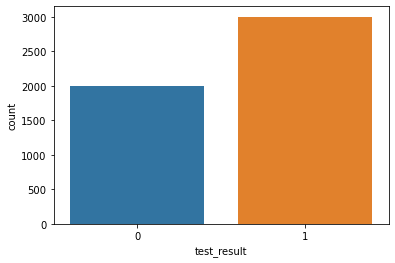

In [130]:
sns.countplot(data = df, x ="test_result");

### <span style = "color:#86a303;font-family:arial bold">We will use box plot for the distribution of features per category

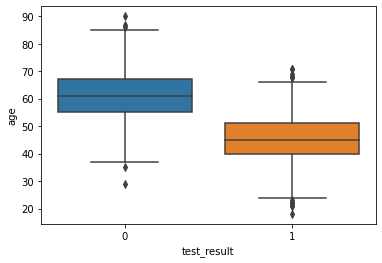

In [131]:
sns.boxplot(x = "test_result", y = "age",data= df);

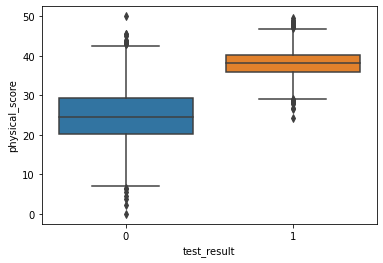

In [132]:
sns.boxplot(x = "test_result", y = "physical_score",data= df);

## <span style = "color:#86a303;font-family:arial bold"> To see the relation between features, we will draw scatter plot

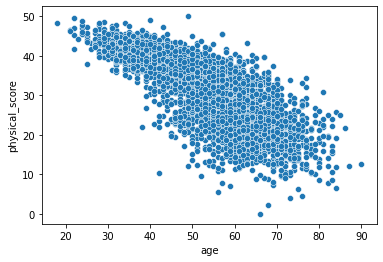

In [133]:
sns.scatterplot(x= 'age',y = 'physical_score',data = df);

### <span style = "color:#86a303;font-family:arial bold">It depicts the linear retaionship as once age goes up the physical score goes down and we can add hue as test result in scatter plot

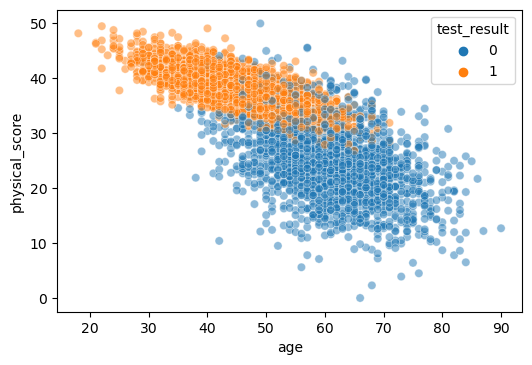

In [134]:
plt.figure(dpi = 100)
sns.scatterplot(x= 'age',y = 'physical_score',
                data = df,hue = "test_result", alpha = 0.5);

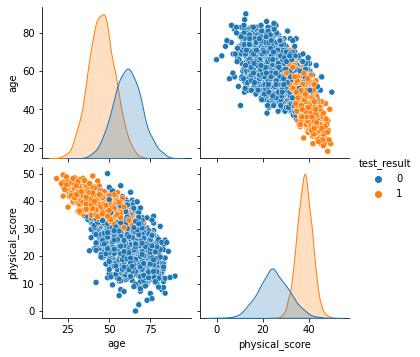

In [135]:
sns.pairplot(df, hue = 'test_result');# recoomended specially for classification

### <span style = "color:#86a303;font-family:arial bold"> To check the correlation of features we can see the heatmap

<AxesSubplot:>

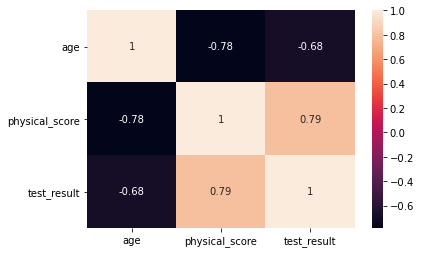

In [136]:
sns.heatmap(df.corr(),annot = True)

### <span style = "color:#86a303;font-family:arial bold">Sometimes when we are dealing with classes scatter plot plt don't do well, if your axes are based on the class

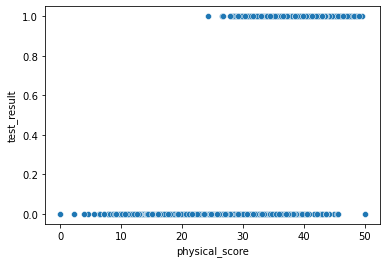

In [137]:
sns.scatterplot(x = "physical_score", y = "test_result",data=df);

### <span style = "color:#86a303;font-family:arial bold">Like the above it is the same information aswe saw in box plot. Rather we can plot a 3d plot in this scenario</span>
https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html

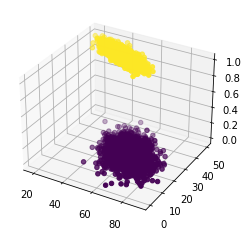

In [138]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df['age'],df["physical_score"],df["test_result"], c =df["test_result"] )

### <span style = "color:#86a303;font-family:arial bold"> From above we can clearly see a sepearation of people who passed and not, which means the model should be able score very well with the calssification data

# <span style = "color:#86a303;font-family:arial bold"> Logistic Regression- Model Training

In [139]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [140]:
X = df.drop('test_result',axis=1)

In [141]:
y = df["test_result"]

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()

In [146]:
scaler_X_train = scaler.fit_transform(X_train)

In [147]:
scaler_X_test = scaler.transform(X_test)

In [148]:
from sklearn.linear_model import LogisticRegression

In [149]:
log_model = LogisticRegression()

In [150]:
log_model.fit(scaler_X_train,y_train)

LogisticRegression()

In [151]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [152]:
y_pred = log_model.predict(scaler_X_test)

In [153]:
y_pred2 = log_model.predict_proba(scaler_X_test)

## <span style = "color:#86a303;font-family:arial bold">If we want to predict the probability then we have predict_proba and predic_log_proba avaiable they provide the two sets of terms that esentially the probability of the instance belonging to 0 and 1 class

In [154]:
y_pred2

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

## <span style = "color:#86a303;font-family:arial bold"> Before prceeding Lets have a look at classfication Performace metrics

# <span style = "color:#86a303;font-family:arial bold"> Classification Performance Metrics- Confusion Matrix and Accuracy

### <span style = "color:#86a303;font-family:arial bold"> Lets say we have developed a model to detect the presence of Covid Infection</span>
### <span style = "color:#86a303;font-family:arial bold"> We built a regression model predicting:
* 0 - Non Infected (Tests Negative)
* 1 - Infected ( Tests Positive)

## <span style = "color:#86a303;font-family:arial bold">Its is unlikely our model will perform perfectly. This means there  are 4 possible outcomes:
* Infected person tests positive.
* Healthy person test negative.</span>
##### <span style = "color:#86a303;font-family:arial bold"> The above kind of response we expect from our model but in real world it is unlikely our test is perfect. We could get the following two results as well</span>
#### <span style = "color:red;font-family:arial bold">* Infected person tests negative.</span>
#### <span style = "color:red;font-family:arial bold">* Healthy person tests positive.
 

### <span style = "color:#86a303;font-family:arial bold"> Based off these 4 possibilies, there are many error metrics can be calculated 

## <span style = "color:#86a303;font-family:arial bold"> Let's start by visualizing these four possibilities as a matrix.

## <span style = "color:#86a303;font-family:arial bold"> Confusion Matrix

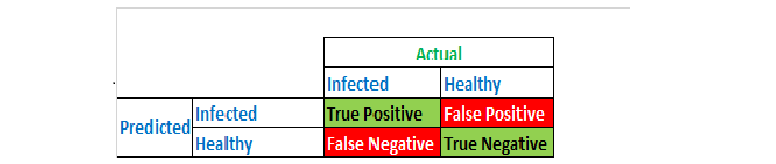

## <span style = "color:#86a303;font-family:arial bold"> In the above demo we have 4 results actual vs predicted</span>
## <span style = "color:#86a303;font-family:arial bold"> If someone we "predcited" Infected and they were "actually" infected we label them as TRUE POSITIVE(1)</span>
## <span style = "color:#86a303;font-family:arial bold"> If someone we "predcited" healthy and  they were "actually" healthy we label them as TRUE NEGATIVE(0)</span>
#### <span style = "color:#86a303;font-family:arial bold"> So far we are good with predctions</span>
## <span style = "color:#86a303;font-family:arial bold"> If someone we "predcited" Infected and rethey we "actually" Healthy we label them as FALSE POSITIVE</span>
## <span style = "color:#86a303;font-family:arial bold"> If someone we "predcited" Healthy and they were "actually" Infected we label them as FALSE NEGATIVE</span>

## <span style = "color:#86a303;font-family:arial bold">With the above matrics we can calculate differnt ratio's</span>
## <span style = "color:#86a303;font-family:arial bold"> Let's take and example we have 5 are infected and 95 healthy and we test all the patients and comesup with some results:</span>
## <h3 align="center"> <span style = "color:#86a303;font-family:arial bold">Actual</span></h3>
## <span style = "color:#86a303;font-family:arial bold">Predicted $\frac{Infected}{Healthy}\Large\frac{Infected}{\frac{4}{2}}\Large\frac{Healthy}{\frac{1}{93}}$


## <span style = "color:#86a303;font-family:arial bold"> With the above Matrix we can calculate various metrics</span>
## <span style = "color:#86a303;font-family:arial bold">First is accuracy

## <span style = "color:#86a303;font-family:arial bold"> Accuracy is explained as how often the model is correct? and calculated as Accuracy = (Total positive + Total Negative)/Total

In [155]:
# which meand from the above example we have 4 true positive and 93 true nagative
np.round(100*((4+93)/100),2)# which means we care achieving 97% accuracy

97.0

## <span style = "color:#86a303;font-family:arial bold">Now question comes is this accuracy correct and another topics comes in picture that is accurracy paradox

## <span style = "color:#86a303;font-family:arial bold">There could be a situation where we have imbalanced label, imagine our model always report back "Healthy" in this scenario our model will look like below

## <h3 align="center"> <span style = "color:#86a303;font-family:arial bold">Actual</span></h3>
## <span style = "color:#86a303;font-family:arial bold">Predicted $\frac{Infected}{Healthy}\Large\frac{Infected}{\frac{0}{5}}\Large\frac{Healthy}{\frac{0}{95}}$


## <span style = "color:#86a303;font-family:arial bold">With the above scenario we still achieve high accuracy of 95 as (0+95)/95 = 95% Accuracy.Even though accuracy is high in model but it is still incorrect.Imbalanced classes are much more prevelent in real world which could lead to this situation and that's the reason we have Accuracy Paradox

### * Any classifier dealing with "Imbalanced" classes has to confront the issue of the accuracy paradox.
### * "Imbalanced" classes with always result in a distorted accuracy reflecting better performance that what is truly warranted
### * Imbalaced classes examples are Medical conditions- certain medical conditons can only affect a small protions of the population
###  * Fraud dectection- percentage of fraud transactions against the legitimate transactions are quite small so for fraud dectection accuracy alone is not a good metric

### <span style = "color:#86a303;font-family:arial bold">If a class is only has small (n%) then a predict majority classes will always have an accuracy of (1-n) for e.g. A class has 4% then accuracy will be 96% i.e (1-0.04)</span>
### <span style = "color:#86a303;font-family:arial bold">As we saw above infected were only 5% in the dat, which allowed accruacy to be 95%

## <span style = "color:#86a303;font-family:arial bold">* This means we shouldn't solely rely on accuracy as metrics!</span>
## <span style = "color:#86a303;font-family:arial bold">* This is wehere precision, recall and f1-score will come in

# <span style = "color:#86a303;font-family:arial bold"> Classification Performace Metrics- Precision and Recall

#### <span style = "color:#86a303;font-family:arial bold"> We now know how to calculated accuracy and its associated paradox.</span>
### <span style = "color:#86a303;font-family:arial bold"> There are three more metrics which can help to get a clearer picture of performace:
* Recall(or sensitivity)
* Precison
* F1-Score (which essentially combines recall and precison)

# <span style = "color:#86a303;font-family:arial bold"> Recall</span>
### <span style = "color:#86a303;font-family:arial bold"> When it acutally is a positive case, how often is it correct i.e. Total positive/Total Actual positive</span>
## <h3 align="center"> <span style = "color:#86a303;font-family:arial bold">Actual</span></h3>
## <span style = "color:#86a303;font-family:arial bold">Predicted $\frac{Infected}{Healthy}\underline{\Large\frac{Infected}{\frac{4}{1}}}\Large\frac{Healthy}{\frac{2}{93}}$


## <span style = "color:#86a303;font-family:arial bold"> Here underline part of the table is Total Actual Positive or infected i.e 4+1 = 5 & if we have 4 as  total positive then recall is 4/5 = 0.8 . Another way to describe recall is how many relevent cases found.

## <span style = "color:#86a303;font-family:arial bold">Now with the imbalanced data, we had total 5 Actual positive and 0 as true positive , in this scenario Recall = 0/5 which is essentailly 0. Which mean A recall of 0 alerts you that model isn't chatching cases!
   

# <span style = "color:#86a303;font-family:arial bold">Precision</span>
### <span style = "color:#86a303;font-family:arial bold"> Precision answers the question when prediction is positive how often it correct</span>
### <span style = "color:#86a303;font-family:arial bold">Precision = Total Positives/ Total predicted positives </span>

## <h3 align="center"> <span style = "color:#86a303;font-family:arial bold">Actual</span></h3>
## <span style = "color:#86a303;font-family:arial bold">Predicted $\frac{Infected}{Healthy}\Large\frac{Infected}{\frac{|4|}{1}}\Large\frac{Healthy}{\frac{|2|}{93}}$

### <span style = "color:#86a303;font-family:arial bold"> So with the above example out Total predicted positive (infected) is 4 + 2 = 6 and out True Positive is 4 

### <span style = "color:#86a303;font-family:arial bold"> Precison for the above example = 4 / 6 = 0.666 </span>
### <span style = "color:#86a303;font-family:arial bold">Now with the imbalanced data, we had total 0 predited positive and 0 as true positive , in this scenario Precison = 0/0 which is essentailly undefined. </span>
### <span style = "color:#86a303;font-family:arial bold"> Which means Recall and Precision do not fall to accuracy paradox

### <span style = "color:#86a303;font-family:arial bold"> Recall and Precision can help Illuminate out performance specifically in regards to the relavant or positive case.</span>
### <span style = "color:#86a303;font-family:arial bold"> Depending on the model there is typically a trade-off between precision and recall. which we will explore with ROC(Receiver operator characteristic curve</span>


# <span style = "color:#86a303;font-family:arial bold">F1-Score:</span>
### <span style = "color:#86a303;font-family:arial bold"> Since precison and recall are realted to each other through the numerator i.e. Total Positives, we often also report the F1-Score, which is the harmonic mean of precion and recall

## <span style = "color:#86a303;font-family:arial bold">$\large{F}{ = } \frac{{2}{\hspace{1em} X }{\hspace{1em}precision}{\hspace{1em}X}{\hspace{1em}recall}}{{precision}{\hspace{1em}+}{\hspace{1em}recall}}$

## <span style = "color:#86a303;font-family:arial bold">We use the harmonic mean(insted of the normal mean) because it allows entire harmonic mean to go to zero if either precision or recall ends up being zero

# <span style = "color:#86a303;font-family:arial bold"> ROC Curves</span>

### <span style = "color:#86a303;font-family:arial bold"> Receiver Operator Characteristics Curve</span>
### <span style = "color:#86a303;font-family:arial bold"> Essentially there can be a trade-off between TRU positives and Fasle Positives

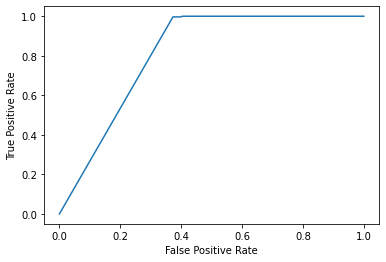

In [156]:
from sklearn.metrics import roc_curve
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr,tpr,_= roc_curve(y_test, y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

## <span style = "color:#86a303;font-family:arial bold"> Here lets say we have a cut off as 0.5 on y-axis which meand anything above 0.5 is positive and less than 0.5 negative</span>

#### <span style = "color:#86a303;font-family:arial bold"> We have few actual's prected positive and few prediced fasle positive and vice versa  for predcied negative

#### <span style = "color:#86a303;font-family:arial bold">Now let's We have TP:3, FP:1, FN:1, TN:3

### <span style = "color:#86a303;font-family:arial bold"> Now if reduce our cut off to 0.4 we include one 1 FN above the cutoff to make it another FP. This way we have reduced 1 fasle nagative by making it a fasle positive.

### <span style = "color:#86a303;font-family:arial bold">Why we reduced the cut off can be explained as in some situations, we gladly accept more fasle positive to reduce fasle negative for e.g.
* Imaging a covid dectection test, we would rather produce false positives and later do more stringent examine like RTPCR test than accidentally release a fasle negative which later could be more dangerous.

### <span style = "color:#86a303;font-family:arial bold"> So in ROC curve we chart the TRUE Vs Flase positives for various cut-offs for the ROC curve.</span>
### <span style = "color:#86a303;font-family:arial bold">By changing the cut-off limit, we can adjust our True vs False positive!</span>
## <span style = "color:#86a303;font-family:arial bold"> A perfect Model would have a zero FPR(False Positive Rate)</span>


## <span style = "color:#86a303;font-family:arial bold"> AUC - Aread under curve allows us to compare ROC's of different models.

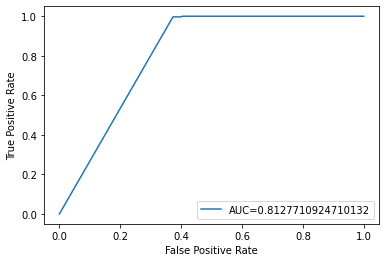

In [157]:
from sklearn.metrics import roc_curve , roc_auc_score
y_pred_proba = log_model.predict_proba(X_test)[::,1]
fpr,tpr,_= roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4);

### <span style = "color:#86a303;font-family:arial bold"> The perfect possible for AUC is 1

## <span style = "color:#86a303;font-family:arial bold"> This also allow us to directly compare ROC curves for different models instead of having to test all the cutoffs and compare with confusion matrix of one cut off vs the confution matrix of another cutoff

### <span style = "color:#86a303;font-family:arial bold"> We can also create precison vs recall curves

### <span style = "color:#86a303;font-family:arial bold"> Logistic Regression Performance Evaluation

In [158]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

### <span style = "color:#86a303;font-family:arial bold">Coeficients are in terms of belonging to class 1
* We noticed that age coeficient is negative which means age factor increases we would expect the odds of belongig to Class 1 will decrease.
* We saw that in the box plot as age increases the test results are more to class to 0

In [159]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [160]:
y_pred = log_model.predict(scaler_X_test)

In [161]:
accuracy_score(y_test,y_pred)

0.93

### <span style = "color:#86a303;font-family:arial bold">It means are accuracy score is 93% accurate. As we know about acccuracy paradox, we will check other metrics

In [162]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

### <span style = "color:#86a303;font-family:arial bold"> We can create a plot for the confution matrix

In [163]:
from sklearn.metrics import plot_confusion_matrix

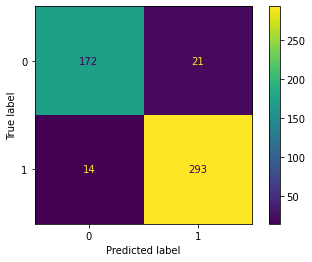

In [164]:
plot_confusion_matrix(log_model,scaler_X_test,y_test)# we can create for any classification model even for random forrest in future)

### <span style = "color:#86a303;font-family:arial bold"> We can now see a good color plot with True(Actual) Label and predicted label

### <span style = "color:#86a303;font-family:arial bold"> To check the precision & recall we can create classifcation report with the metrics we have already built.
   

In [165]:
print(classification_report(y_test,y_pred))# allways use print command to see it in a nice structure

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



### <span style = "color:#86a303;font-family:arial bold"> Here is Recall is answering how many of a particualr class are you finding over the whole number of elements of that class.</span>
### <span style = "color:#86a303;font-family:arial bold"> Precision is answering how many are correctly classifed among that class</span>
### <span style = "color:#86a303;font-family:arial bold">F1_score is showing the harmonic mean between precision and recall</span>
### <span style = "color:#86a303;font-family:arial bold"> Support columns is expressing how many instances you had for each class in the test set</span>
### <span style = "color:#86a303;font-family:arial bold"> With the support column we can see it is relatively balalced dataset with 193 0 class and 307 1 class</span>
### <span style = "color:#86a303;font-family:arial bold"> In general when our precision and recall are matching with accuracy it means out dataset is not imbalanced dataset</span>


### <span style = "color:#86a303;font-family:arial bold"> If want to just see the precision or recall

In [166]:
from sklearn.metrics import precision_score,recall_score

In [167]:
precision_score(y_test,y_pred)

0.9331210191082803

In [168]:
recall_score(y_test,y_pred)

0.9543973941368078

### <span style = "color:#86a303;font-family:arial bold"> Finally we will do ROC curve, and Precision Recall curve

In [169]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

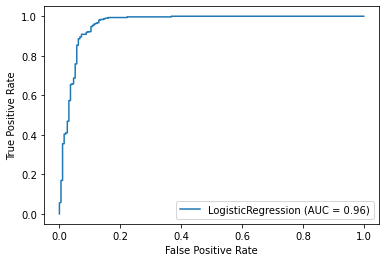

In [170]:
plot_roc_curve(log_model,scaler_X_test,y_test)

## <span style = "color:#86a303;font-family:arial bold"> There is an option to edit these as have ax parameter.

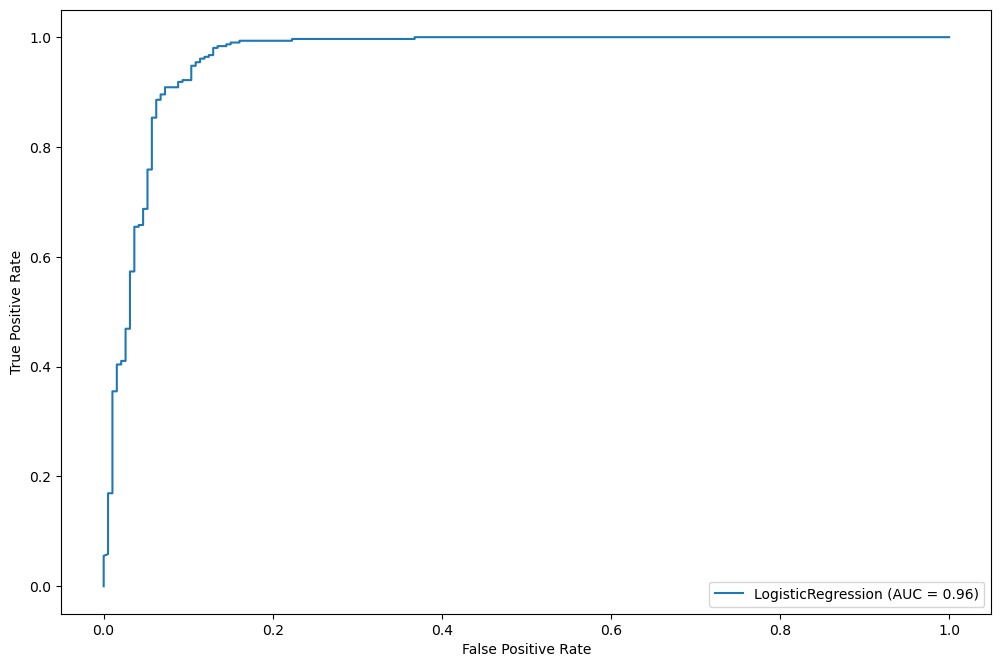

In [171]:
fig, ax = plt.subplots(figsize = (12,8), dpi=100)
plot_roc_curve(log_model,scaler_X_test,y_test, ax = ax)


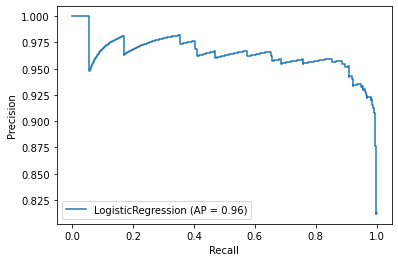

In [172]:
plot_precision_recall_curve(log_model,scaler_X_test,y_test)

In [173]:
log_model.predict_proba(scaler_X_test)[0]

array([0.02384343, 0.97615657])

In [174]:
y_test[0]

1

# <span style = "color:#6b025b;font-family:arial bold">Multi-Class Classificatin with Logistic Regression - Data and EDA

In [175]:
df2 = pd.read_csv("iris.csv")

In [176]:
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [177]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [178]:
df2.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [179]:
df2["species"].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

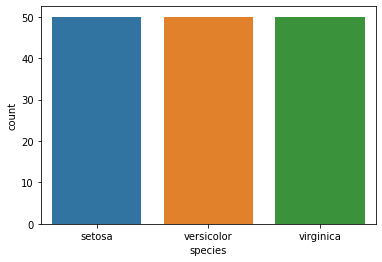

In [180]:
sns.countplot(x= "species",data = df2)

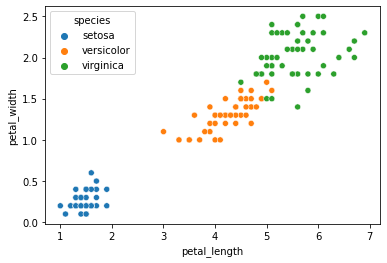

In [181]:
sns.scatterplot(x= "petal_length",y= "petal_width", data = df2, hue = "species");

## <span style = "color:#6b025b;font-family:arial bold"> We can see Setosa is clearly seperate class, but Virginica and versicolor at some points are merging.

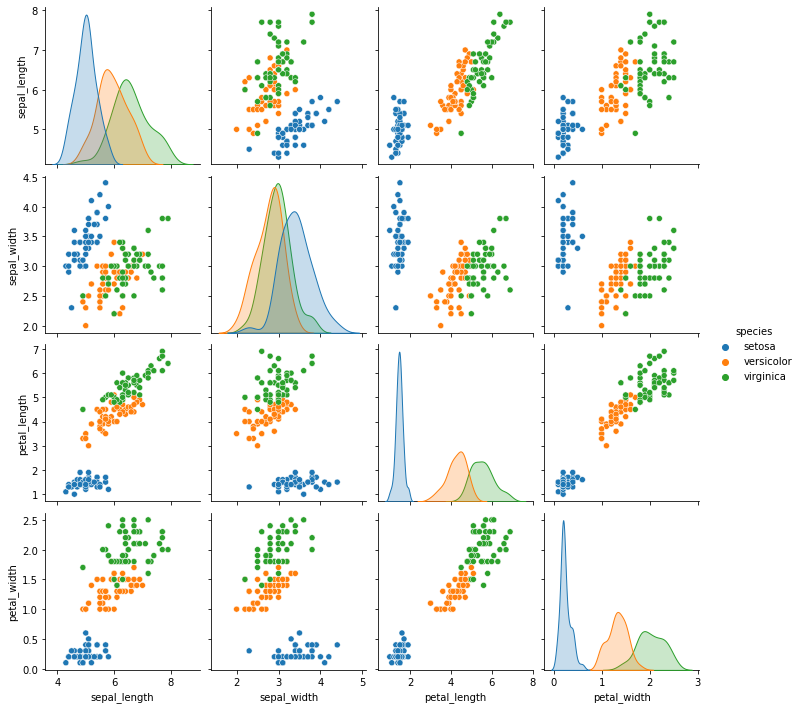

In [182]:
sns.pairplot(df2,hue= 'species')

### <span style = "color:#6b025b;font-family:arial bold"> We can make out setosa is seperate on all the features but Versiclor and Virginca are not making them hard to perfectly classify

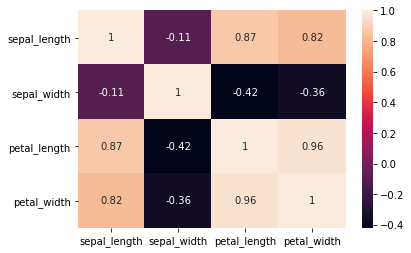

In [183]:
sns.heatmap(df2.corr(), annot=True);

### <span style = "color:#6b025b;font-family:arial bold"> We can see a very strong correlation between petal_lenght, petal_width and sepal_lenght

In [184]:
X = df2.drop("species",axis = 1)

In [185]:
y = df2["species"]

### <span style = "color:#6b025b;font-family:arial bold">With Sklearn we don't need to worry to integer encoding or One hot coding becuase sklearn has no issues if you are passing classes as strings

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
from sklearn.preprocessing import StandardScaler

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [189]:
scaler = StandardScaler()

In [190]:
scaled_X_train = scaler.fit_transform(X_train)

In [191]:
scaled_X_test = scaler.transform(X_test)

In [192]:
from sklearn.linear_model import LogisticRegression

In [193]:
from sklearn.model_selection import GridSearchCV

### <span style = "color:#6b025b;font-family:arial bold">When we look at the hyperparameters of logistic regression we have penalty for regularization though for elasticnet we need to provide the l1 ratio, then there is a multiclass parmeter and three options are auto, ovr and multinomial , for using logistic model for multiclass we use approach of one versus rest(ovr), and ovr does it by seperating out one class at a time for all the others, so it builds the model to speratre one class from another and then switches to another class and seperate it from others.

### <span style = "color:#6b025b;font-family:arial bold"> Also not every multicall call is compatibale with solving optimization problem and there are different solver avaibale in solver hyperparameter:
solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:

* For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

* For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

* ‘liblinear’ and is limited to one-versus-rest schemes.

* ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories.Note that it is limited to binary classification and the one-versus-rest reduction for multiclass classification.
* When you are using Supported penalties by solver:
    * ‘lbfgs’ - [‘l2’, None]
    * ‘liblinear’ - [‘l1’, ‘l2’]
    * ‘newton-cg’ - [‘l2’, None]
    * ‘newton-cholesky’ - [‘l2’, None]
    * ‘sag’ - [‘l2’, None]
    * ‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, None]</span>
### <span style = "color:#6b025b;font-family:arial bold"> Also when we are using more complex penalty term like elastic net we need to increase the max_iter as well

In [195]:
log_model2= LogisticRegression(solver="saga",multi_class='ovr',max_iter=5000)

In [196]:
penalty=['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {"penalty":penalty,
             'l1_ratio':l1_ratio,
             'C':C}
# keys should match with the pramerter name

In [197]:
grid_model = GridSearchCV(log_model2,param_grid=param_grid)

In [ ]:
grid_model.fit(scaled_X_train,y_train)

In [ ]:
# the above Cell will take lot of time to run

In [199]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [200]:
grid_model.best_params_

{'C': 11.28837891684689,
 'l1_ratio': 0.3157894736842105,
 'penalty': 'elasticnet'}

In [201]:
y_pred3  = grid_model.predict(scaled_X_test)

In [202]:
y_pred3

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [203]:
accuracy_score(y_test, y_pred3)

0.9736842105263158

In [204]:
confusion_matrix(y_test,y_pred3)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

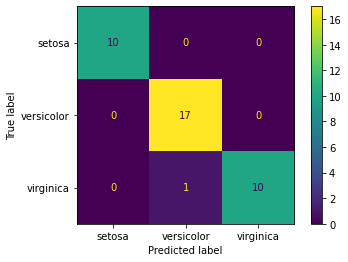

In [205]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

In [206]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# <span style = "color:#6b025b;font-family:arial bold"> Built in plot ROC function in SKlearn doesn't current at work automatically for multi-class situations

In [207]:
from sklearn.metrics import plot_roc_curve

In [208]:
plot_roc_curve(grid_model,scaled_X_test,y_test)

ValueError: GridSearchCV should be a binary classifier

### <span style = "color:#6b025b;font-family:arial bold"> Look at the Value error it says it should be a binary classifier. In this situation please go to Sklearn plot roc documentation  https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html and copy a code from Plot all OvR ROC curves together

In [209]:
from sklearn.metrics import roc_curve,auc

In [210]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

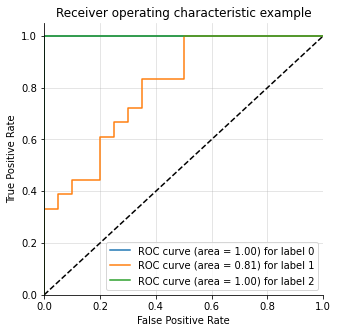

In [211]:
plot_multiclass_roc(grid_model,scaled_X_test,y_pred3, n_classes=3)